In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ema_workbench.analysis import feature_scoring
import os
sys.path.append('..')
import rbf_functions

In [25]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

In [32]:
refset = {}
varset = {}
for entry in rbfs:
    name = entry.__name__
    # load variables
    output_dir = os.path.abspath('../notebooks/refsets/')
    for filename in os.listdir(output_dir):
        if filename == f'{name}_refset.csv':
            df_refs = pd.read_csv(f"{output_dir}/{filename}")
            refset[name] = df_refs
        elif filename == f'{name}_refset_variables.csv':
            df_vars = pd.read_csv(f"{output_dir}/{filename}",header=None)
            columnname = ["c1","r1","c2","r2","c3","r3","c4","r4","c5","r5","c6","r6","c7","r7","c8","r8","w01","w02","w03","w04","w05","w06","w07","w08","w09","w10","w11","w12","w13","w14","w15","w16"]
            df_vars.columns = columnname
            varset[name] = df_vars
varset.keys()

dict_keys(['original_rbf', 'squared_exponential_rbf', 'inverse_quadratic_rbf', 'inverse_multiquadric_rbf', 'exponential_rbf', 'matern32_rbf', 'matern52_rbf'])

In [33]:
refset['original_rbf'].head()

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation
0,73.703711,0.862714,0.666536,0.771407,0.083849,1.0
1,71.338386,0.841340,0.459287,0.553534,0.078155,1.0
2,76.572454,0.931601,0.676782,0.755022,0.086515,1.0
3,64.625256,0.692799,0.419601,0.611561,0.074892,1.0
4,75.387023,0.889018,0.452169,0.853073,0.081847,1.0


In [22]:
varset['original_rbf'].head()

,c1,r1,c2,r2,c3,r3,c4,r4,c5,r5,...,w07,w08,w09,w10,w11,w12,w13,w14,w15,w16
0,0.036668,0.973421,0.900285,0.885349,0.146847,0.751317,0.806985,0.707743,0.391899,0.624161,...,0.757252,0.627926,0.880647,0.480056,0.181161,0.681784,0.439958,0.839697,0.033278,0.640126
1,0.152994,0.335009,0.899115,0.618817,0.238318,0.214879,0.965039,0.900567,0.844892,0.994257,...,0.792985,0.746807,0.898239,0.044494,0.477361,0.977770,0.425784,0.825668,0.859335,0.150197
2,0.019714,0.950085,0.914442,0.625213,0.308721,0.296807,0.888348,0.292957,0.595290,0.891024,...,0.697357,0.247823,0.869280,0.268272,0.466238,0.682806,0.705736,0.839996,0.843696,0.186293
3,-0.659559,0.919909,0.503720,0.634692,0.307407,0.238550,0.845957,0.270583,0.349176,0.804324,...,0.924142,0.729116,0.895973,0.028989,0.741654,0.692732,0.435297,0.065038,0.827535,0.644395
4,0.175873,0.286055,0.735462,0.757530,0.310653,0.779625,0.990642,0.899690,0.553658,0.842032,...,0.788591,0.406959,0.917086,0.005053,0.740289,0.691624,0.241013,0.054067,0.072609,0.102095


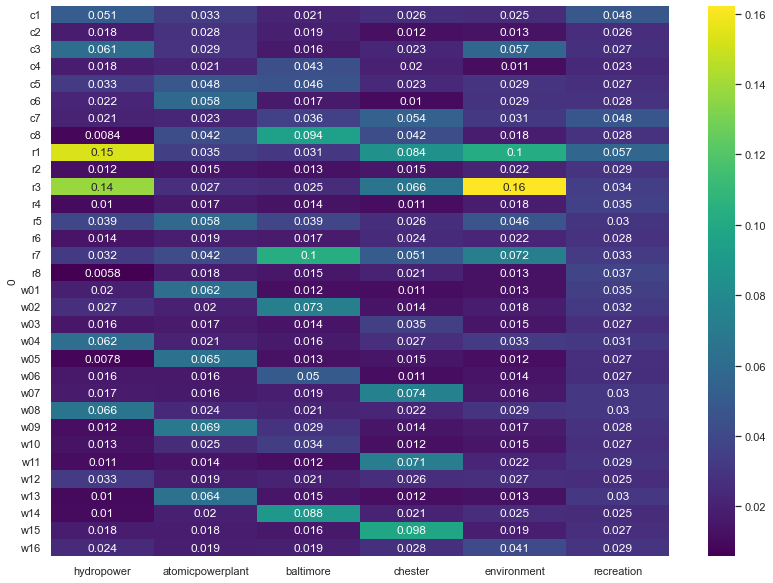

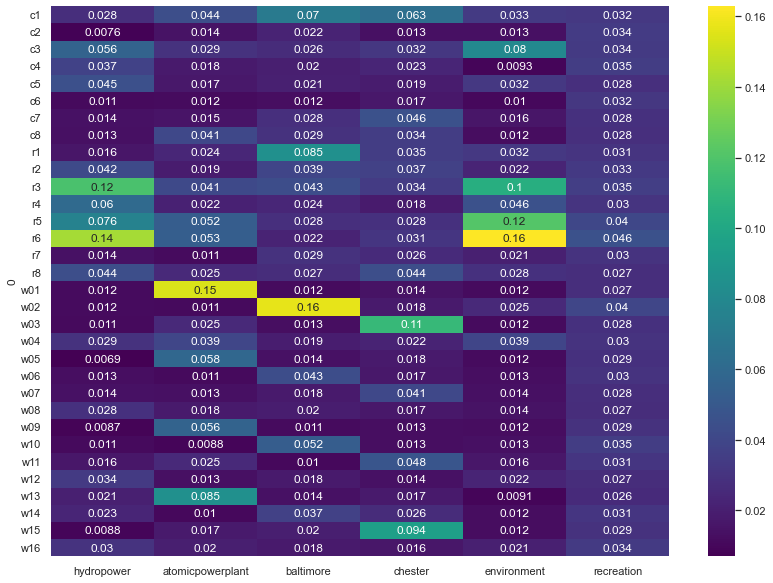

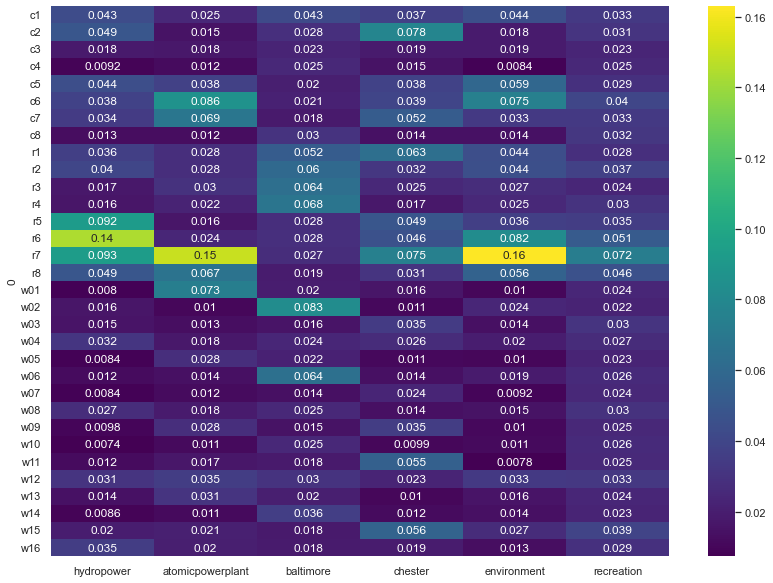

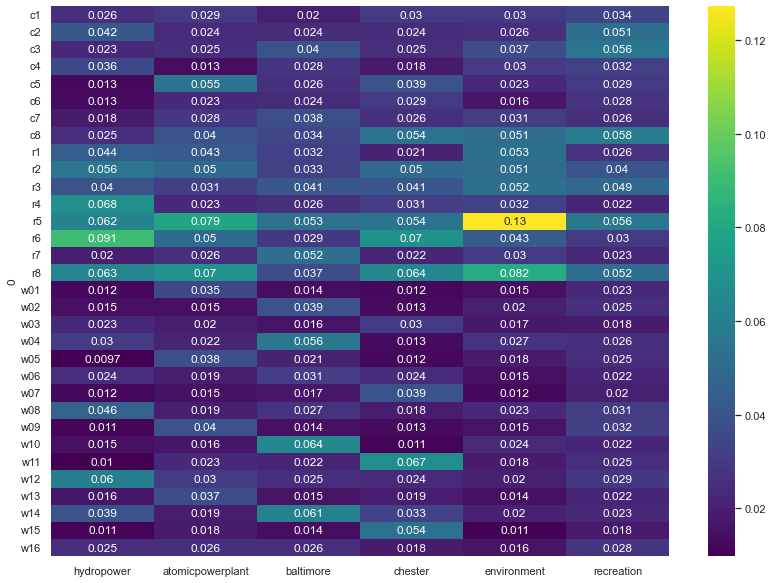

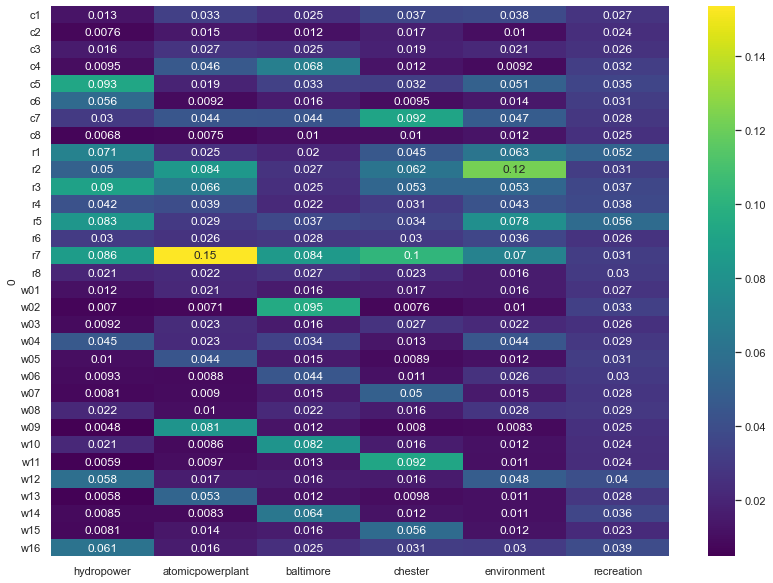

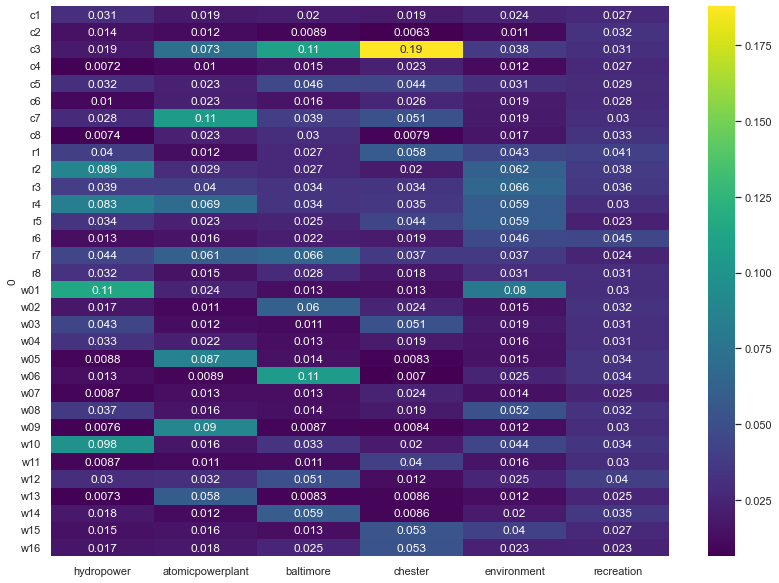

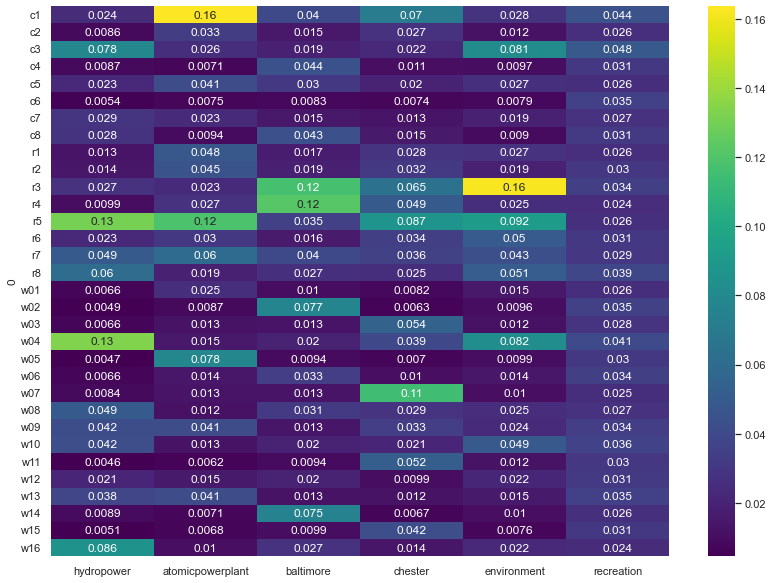

In [54]:
#### sns.set(rc={'figure.figsize':(11.7, 8.27)})

for i in refset:
#     print(i)
    x = varset[i]
    y = {k:np.asarray(v) for k,v in refset[i].to_dict('list').items()}
    
    scores = feature_scoring.get_feature_scores_all(x, y, alg="extra trees")
    g = sns.heatmap(scores, annot=True, cmap='viridis')
#     plt.show()
    plt.tight_layout()
#     plt.savefig(f"feature_score/{i}_fsc")
#     plt.close()
    plt.show()